In [1]:
import numpy as np
from rtmag.process.paper.load import MyModel
import rtmag.process.paper.metric as m
from rtmag.process.paper.analytical_field import get_analytic_b_field
import matplotlib.pyplot as plt

device = "cpu"

In [2]:
l = 0.3
psi = 0.25*np.pi
B = get_analytic_b_field(m=1, l=l, psi=psi)
b_bottom = B[:, :, 0, :]
b_bottom = b_bottom.transpose((1, 0, 2))[None, None, ...]

In [3]:
meta_path = "D:/models/lowlou/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy(b_bottom)
m.evaluate(b, B)

Model loaded from epoch 98
b_norm = 200 G
0.21658587455749512 seconds
C_vec     : 1.00
C_cs      : 0.98
E_n'      : 0.91
E_m'      : 0.81
eps       : 1.01
sigmaJ_b  : 0.24
div_b     : 0.03
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 24.13
div100_b  : 3.47
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9987173361449927,
 'C_cs': 0.9764177112571355,
 "E_n'": 0.9069865403971075,
 "E_m'": 0.8060556523719946,
 'eps': 1.005549225238016,
 'sigmaJ_b': 0.24128580825358936,
 'div_b': 0.0346829522671739,
 'sigmaJ_B': 0.01711949417425956,
 'div_B': 0.0001974989935589587,
 'sig100_b': 24.128580825358938,
 'div100_b': 3.4682952267173897,
 'sig100_B': 1.711949417425956,
 'div100_B': 0.01974989935589587}

In [4]:
from magplot.base import create_mesh, mag_plotter
import pyvista as pv
pv.set_jupyter_backend('static')

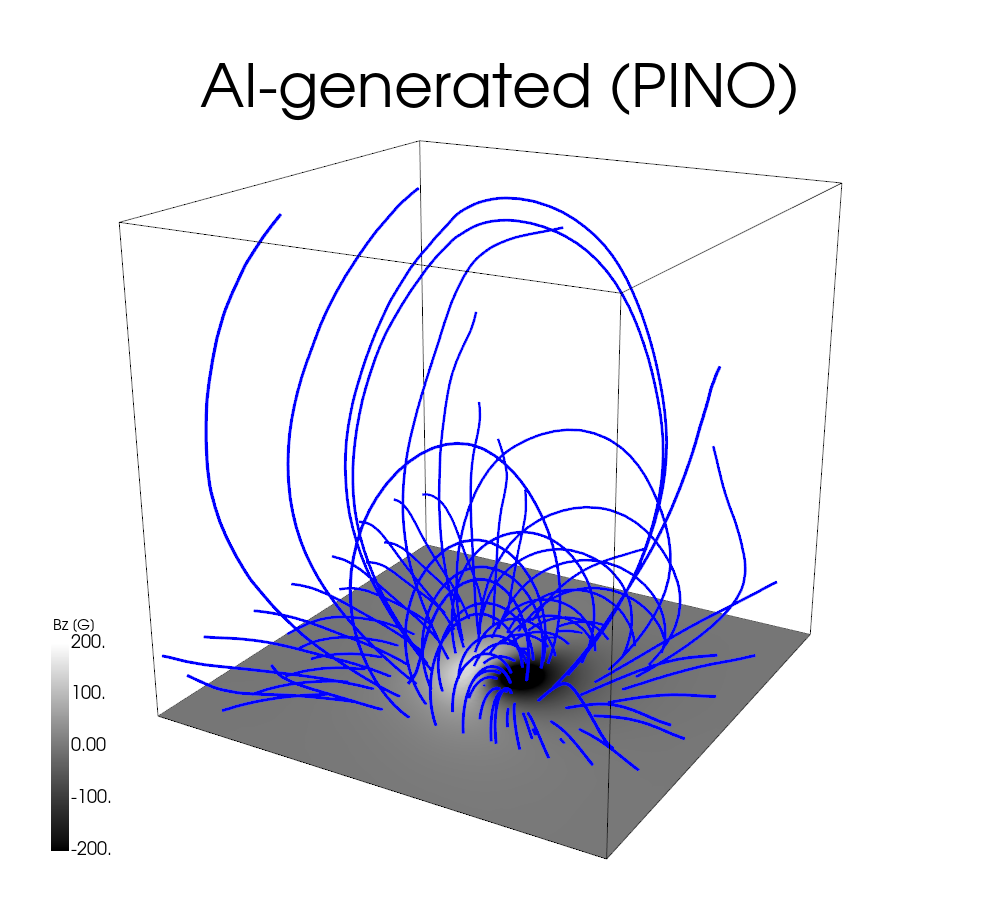

In [5]:
vmin = -200
vmax = 200
i_siz=b.shape[0] / 2
j_siz=b.shape[1] / 2
i_res=8
j_res=8
window_size=(1000, 900)
zoom=1.0
max_time=10000
camera_position = 'xy'
b_title = ''
title_fontsize = 10

bx = b[..., 0]
by = b[..., 1]
bz = b[..., 2]
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottoms, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)
b_tube = b_plot.strl.tube(radius=0.2)

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline(), color='k')
p.add_mesh(b_bottoms, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = 'yz'
p.camera.elevation = 20
p.camera.azimuth = -60
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.add_title("AI-generated (PINO)", font_size=25)
p.screenshot('lowlou_pred.png', transparent_background=True)
p.show()

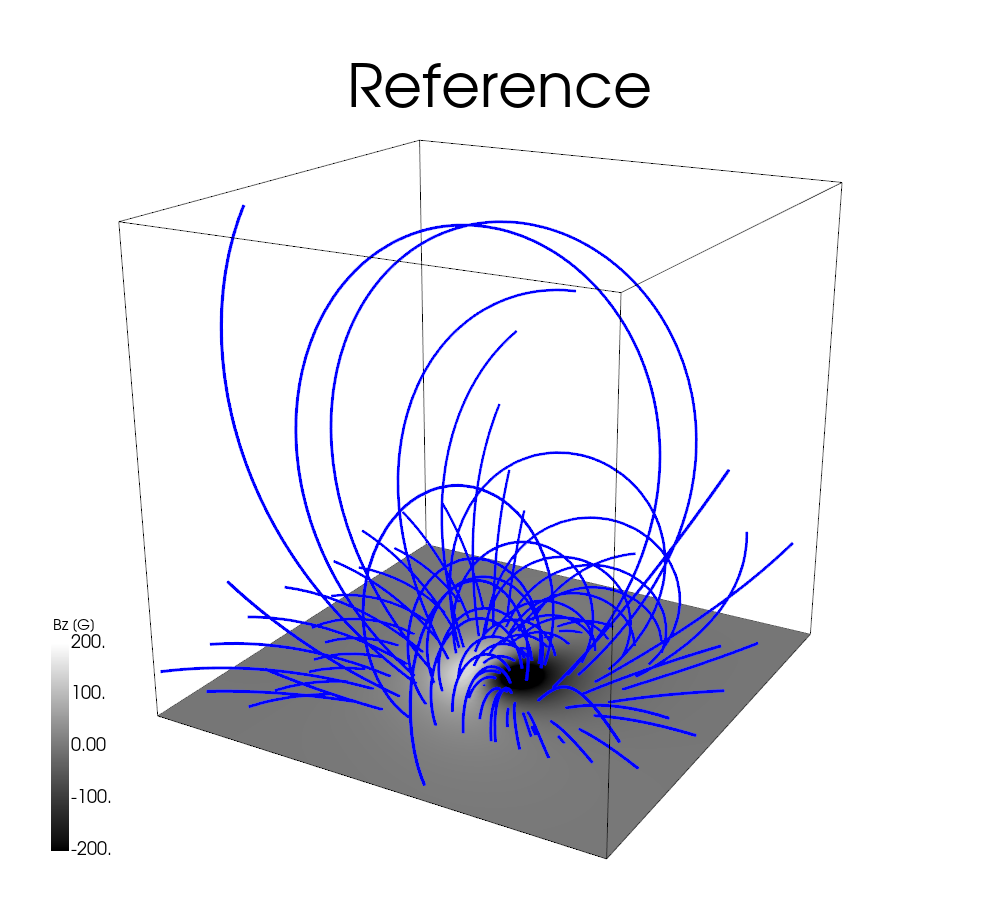

In [6]:
vmin = -200
vmax = 200
i_siz=B.shape[0] / 2
j_siz=B.shape[1] / 2
i_res=8
j_res=8
window_size=(1000, 900)
zoom=1.0
max_time=10000
b_title = ''
title_fontsize = 10

bx = B[..., 0]
by = B[..., 1]
bz = B[..., 2]
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottoms, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)
b_tube = b_plot.strl.tube(radius=0.2)


p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline(), color='k')
p.add_mesh(b_bottoms, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = 'yz'
p.camera.elevation = 20
p.camera.azimuth = -60
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.add_title("Reference", font_size=25)
p.screenshot('lowlou_true.png', transparent_background=True)
p.show()

In [7]:
n = 2

Model loaded from epoch 4
b_norm = 200 G
0.049719810485839844 seconds
C_vec     : 0.99
C_cs      : 0.84
E_n'      : 0.75
E_m'      : 0.55
eps       : 0.95
sigmaJ_b  : 0.43
div_b     : 0.07
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 43.27
div100_b  : 6.96
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9890098504527596,
 'C_cs': 0.8444765855783886,
 "E_n'": 0.7466761352742057,
 "E_m'": 0.5512591014447261,
 'eps': 0.9482287476658768,
 'sigmaJ_b': 0.4327066871212262,
 'div_b': 0.06962802598623752,
 'sigmaJ_B': 0.01711949417425957,
 'div_B': 0.00019749899355895885,
 'sig100_b': 43.270668712122614,
 'div100_b': 6.962802598623751,
 'sig100_B': 1.711949417425957,
 'div100_B': 0.019749899355895884}

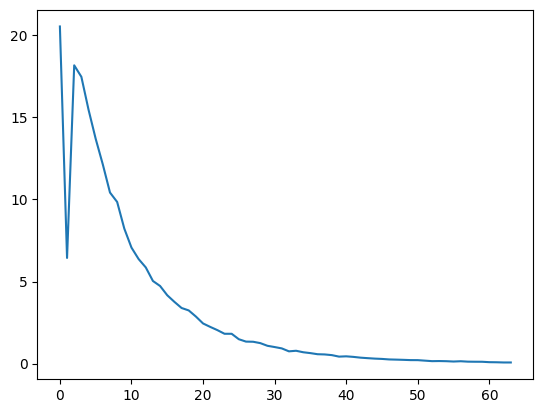

In [22]:
meta_path = "D:/models/_paper/low_lou/model_4.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 98
b_norm = 200 G
0.08225178718566895 seconds
C_vec     : 1.00
C_cs      : 0.98
E_n'      : 0.91
E_m'      : 0.81
eps       : 1.01
sigmaJ_b  : 0.24
div_b     : 0.03
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 24.13
div100_b  : 3.47
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9987173361449956,
 'C_cs': 0.9764177112571382,
 "E_n'": 0.9069865403971079,
 "E_m'": 0.8060556523719953,
 'eps': 1.0055492252380158,
 'sigmaJ_b': 0.24128580825358867,
 'div_b': 0.034682952267173786,
 'sigmaJ_B': 0.017119494174259578,
 'div_B': 0.00019749899355895887,
 'sig100_b': 24.128580825358867,
 'div100_b': 3.4682952267173786,
 'sig100_B': 1.7119494174259577,
 'div100_B': 0.019749899355895887}

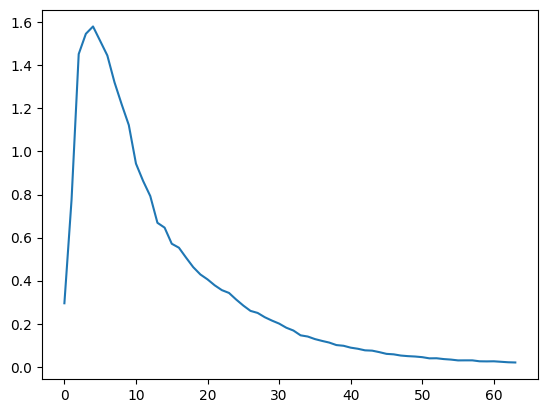

In [9]:
meta_path = "D:/models/_paper/low_lou/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 4
b_norm = 200 G
0.09540796279907227 seconds
C_vec     : 0.99
C_cs      : 0.84
E_n'      : 0.74
E_m'      : 0.54
eps       : 0.89
sigmaJ_b  : 0.31
div_b     : 0.05
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 30.51
div100_b  : 4.68
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.988966121679913,
 'C_cs': 0.8373833916650876,
 "E_n'": 0.7398922197317097,
 "E_m'": 0.5361007094416099,
 'eps': 0.8917386449085668,
 'sigmaJ_b': 0.30512487486146284,
 'div_b': 0.0468432425725591,
 'sigmaJ_B': 0.017119494174259585,
 'div_B': 0.0001974989935589589,
 'sig100_b': 30.512487486146284,
 'div100_b': 4.68432425725591,
 'sig100_B': 1.7119494174259584,
 'div100_B': 0.01974989935589589}

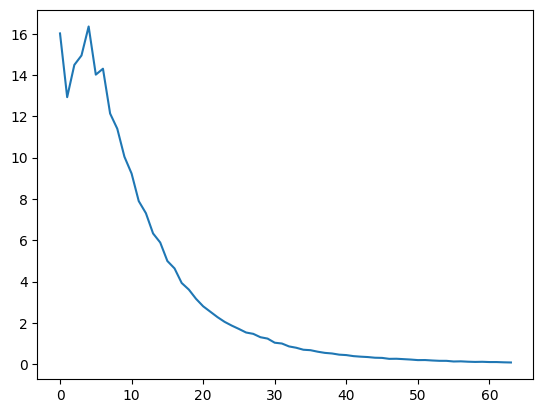

In [21]:
meta_path = "D:/models/newtest/low_lou2/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 82
b_norm = 200 G
0.05950617790222168 seconds
C_vec     : 0.99
C_cs      : 0.95
E_n'      : 0.83
E_m'      : 0.70
eps       : 1.00
sigmaJ_b  : 0.30
div_b     : 0.01
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 29.65
div100_b  : 0.56
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9928039988885505,
 'C_cs': 0.9466454102470818,
 "E_n'": 0.8266598294263274,
 "E_m'": 0.7026202203759452,
 'eps': 1.0042843761130011,
 'sigmaJ_b': 0.29647034184427357,
 'div_b': 0.005632735601038559,
 'sigmaJ_B': 0.01711949417425959,
 'div_B': 0.00019749899355895876,
 'sig100_b': 29.647034184427355,
 'div100_b': 0.5632735601038559,
 'sig100_B': 1.7119494174259589,
 'div100_B': 0.019749899355895877}

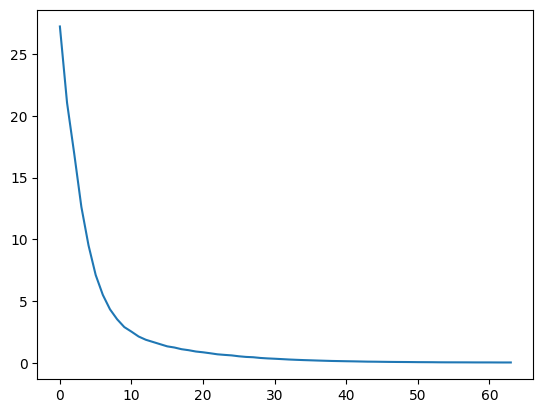

In [10]:
meta_path = "D:/models/test_aaa/lowlow_meta_test_3/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 49
b_norm = 100 G
0.12779664993286133 seconds
C_vec     : 0.99
C_cs      : 0.88
E_n'      : 0.73
E_m'      : 0.52
eps       : 0.96
sigmaJ_b  : 0.22
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 22.11
div100_b  : 0.00
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9875772366169042,
 'C_cs': 0.8776436283303116,
 "E_n'": 0.7301255023761635,
 "E_m'": 0.5201336813964772,
 'eps': 0.9617332524640754,
 'sigmaJ_b': 0.2211109789374453,
 'div_b': 1.677157654655483e-08,
 'sigmaJ_B': 0.01711949417425956,
 'div_B': 0.00019749899355895855,
 'sig100_b': 22.11109789374453,
 'div100_b': 1.677157654655483e-06,
 'sig100_B': 1.711949417425956,
 'div100_B': 0.019749899355895856}

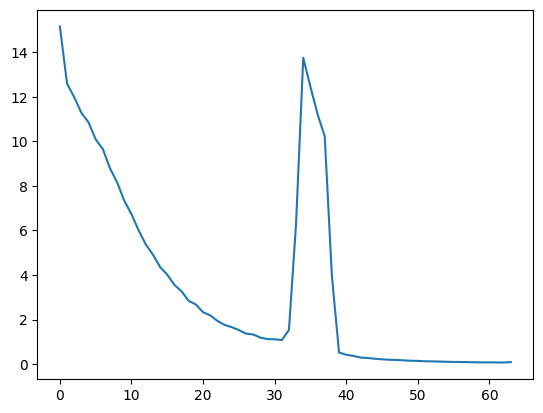

In [11]:
meta_path = "D:/models/test_vecvec/low_lou7/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy_no_div(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 26
b_norm = 200 G
0.08151960372924805 seconds
C_vec     : 0.84
C_cs      : 0.77
E_n'      : 0.32
E_m'      : 0.15
eps       : 1.17
sigmaJ_b  : 0.12
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 12.19
div100_b  : 0.00
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.8444863887652504,
 'C_cs': 0.7737613981046038,
 "E_n'": 0.31964183114302824,
 "E_m'": 0.1456225474444629,
 'eps': 1.1650683079076338,
 'sigmaJ_b': 0.12190342256025989,
 'div_b': 1.8542654900557808e-08,
 'sigmaJ_B': 0.01711949417425959,
 'div_B': 0.00019749899355895893,
 'sig100_b': 12.190342256025989,
 'div100_b': 1.8542654900557809e-06,
 'sig100_B': 1.7119494174259589,
 'div100_B': 0.019749899355895894}

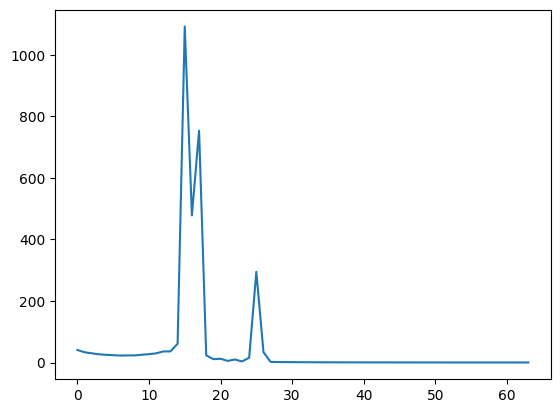

In [12]:
meta_path = "D:/models/test_vecvec/low_lou14/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy_no_div(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 0
b_norm = 100 G
0.08235001564025879 seconds
C_vec     : 0.12
C_cs      : 0.10
E_n'      : -1.92
E_m'      : -3.68
eps       : 4.01
sigmaJ_b  : 0.16
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 15.94
div100_b  : 0.00
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.12132515199985368,
 'C_cs': 0.09822858118595981,
 "E_n'": -1.9218324843165484,
 "E_m'": -3.6821888023363023,
 'eps': 4.010030913324279,
 'sigmaJ_b': 0.15939884393316395,
 'div_b': 2.0635959269565612e-08,
 'sigmaJ_B': 0.01711949417425959,
 'div_B': 0.00019749899355895885,
 'sig100_b': 15.939884393316394,
 'div100_b': 2.0635959269565614e-06,
 'sig100_B': 1.7119494174259589,
 'div100_B': 0.019749899355895884}

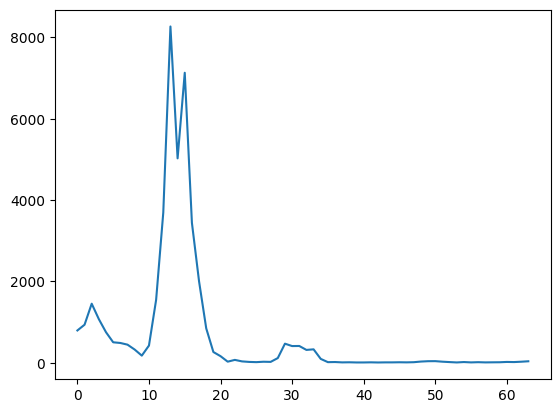

In [13]:
meta_path = "D:/models/test_vecvec/low_lou17/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy_no_div(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 0
b_norm = 200 G
0.07571935653686523 seconds
C_vec     : 0.21
C_cs      : 0.02
E_n'      : -1.00
E_m'      : -3.66
eps       : 0.65
sigmaJ_b  : 0.16
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 16.46
div100_b  : 0.00
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.21343951615453144,
 'C_cs': 0.020568361062842783,
 "E_n'": -1.0036694728006812,
 "E_m'": -3.6625443670851068,
 'eps': 0.6515617215353126,
 'sigmaJ_b': 0.16460413952840486,
 'div_b': 2.3153399438768427e-08,
 'sigmaJ_B': 0.017119494174259585,
 'div_B': 0.00019749899355895885,
 'sig100_b': 16.460413952840486,
 'div100_b': 2.315339943876843e-06,
 'sig100_B': 1.7119494174259584,
 'div100_B': 0.019749899355895884}

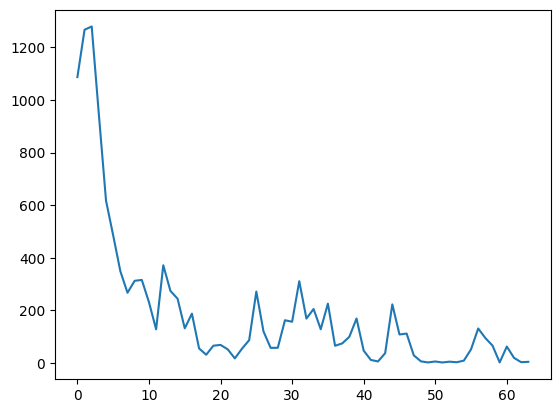

In [14]:
meta_path = "D:/models/test_vecvec/low_lou19/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy_no_div(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

Model loaded from epoch 0
b_norm = 200 G
0.07054996490478516 seconds
C_vec     : 0.93
C_cs      : 0.22
E_n'      : 0.20
E_m'      : -1.17
eps       : 0.87
sigmaJ_b  : 0.41
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 41.28
div100_b  : 0.00
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9275557341267691,
 'C_cs': 0.22344000915447565,
 "E_n'": 0.19579009935160663,
 "E_m'": -1.1737719289152295,
 'eps': 0.8692556950318312,
 'sigmaJ_b': 0.41283574024825714,
 'div_b': 1.8867623708551494e-08,
 'sigmaJ_B': 0.01711949417425958,
 'div_B': 0.0001974989935589588,
 'sig100_b': 41.28357402482571,
 'div100_b': 1.8867623708551494e-06,
 'sig100_B': 1.7119494174259582,
 'div100_B': 0.01974989935589588}

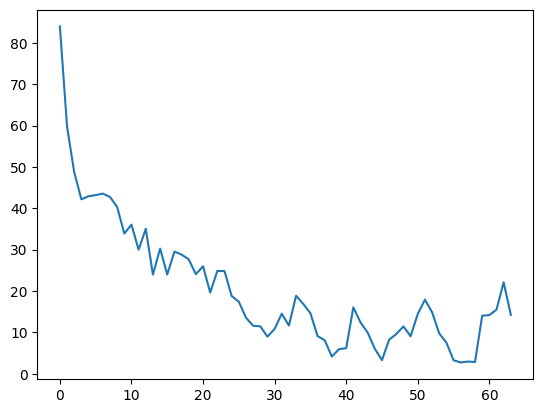

In [15]:
meta_path = "D:/models/test_vecvec/low_lou22/model_0.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy_no_div(b_bottom)
l = ((b-B)**2).sum(-1).mean(axis=(0, 1))
plt.plot(l)
m.evaluate(b, B)

Model loaded from epoch 67
b_norm = 200 G
0.07061266899108887 seconds
C_vec     : 0.98
C_cs      : 0.44
E_n'      : 0.59
E_m'      : -0.12
eps       : 0.92
sigmaJ_b  : 0.07
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 7.49
div100_b  : 0.00
sig100_B  : 1.71
div100_B  : 0.02


{'C_vec': 0.9832906257703277,
 'C_cs': 0.444384493068053,
 "E_n'": 0.5942480165551078,
 "E_m'": -0.11764686442276973,
 'eps': 0.9228266696317945,
 'sigmaJ_b': 0.07485672566077671,
 'div_b': 1.9998402637118904e-08,
 'sigmaJ_B': 0.01711949417425959,
 'div_B': 0.00019749899355895887,
 'sig100_b': 7.485672566077671,
 'div100_b': 1.9998402637118905e-06,
 'sig100_B': 1.7119494174259589,
 'div100_B': 0.019749899355895887}

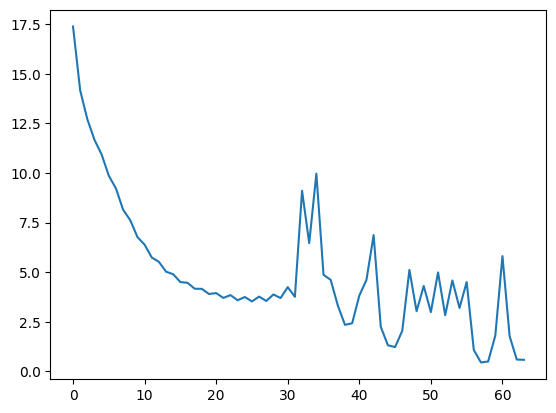

In [16]:
meta_path = "D:/models/test_vecvec/low_lou22/best_model.pt"
mm = MyModel(meta_path, device=device)
b = mm.get_pred_from_numpy_no_div(b_bottom)
plt.plot(((b-B)**2).sum(-1).mean(axis=(0, 1)))
# plt.plot(l)
m.evaluate(b, B)
# m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

In [17]:
n = 16
m.evaluate(b[n:-n, n:-n, :-(2*n), :], B[n:-n, n:-n, :-(2*n), :])

C_vec     : 0.99
C_cs      : 0.94
E_n'      : 0.84
E_m'      : 0.70
eps       : 0.93
sigmaJ_b  : 0.10
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 9.90
div100_b  : 0.38
sig100_B  : 2.20
div100_B  : 0.08


{'C_vec': 0.9945489556851339,
 'C_cs': 0.9370826064971134,
 "E_n'": 0.8409807357184834,
 "E_m'": 0.6984269392578349,
 'eps': 0.9253750256849218,
 'sigmaJ_b': 0.09904749768504821,
 'div_b': 0.003761924980642569,
 'sigmaJ_B': 0.022038004206144275,
 'div_B': 0.0008023360411726128,
 'sig100_b': 9.904749768504821,
 'div100_b': 0.3761924980642569,
 'sig100_B': 2.2038004206144275,
 'div100_B': 0.08023360411726128}

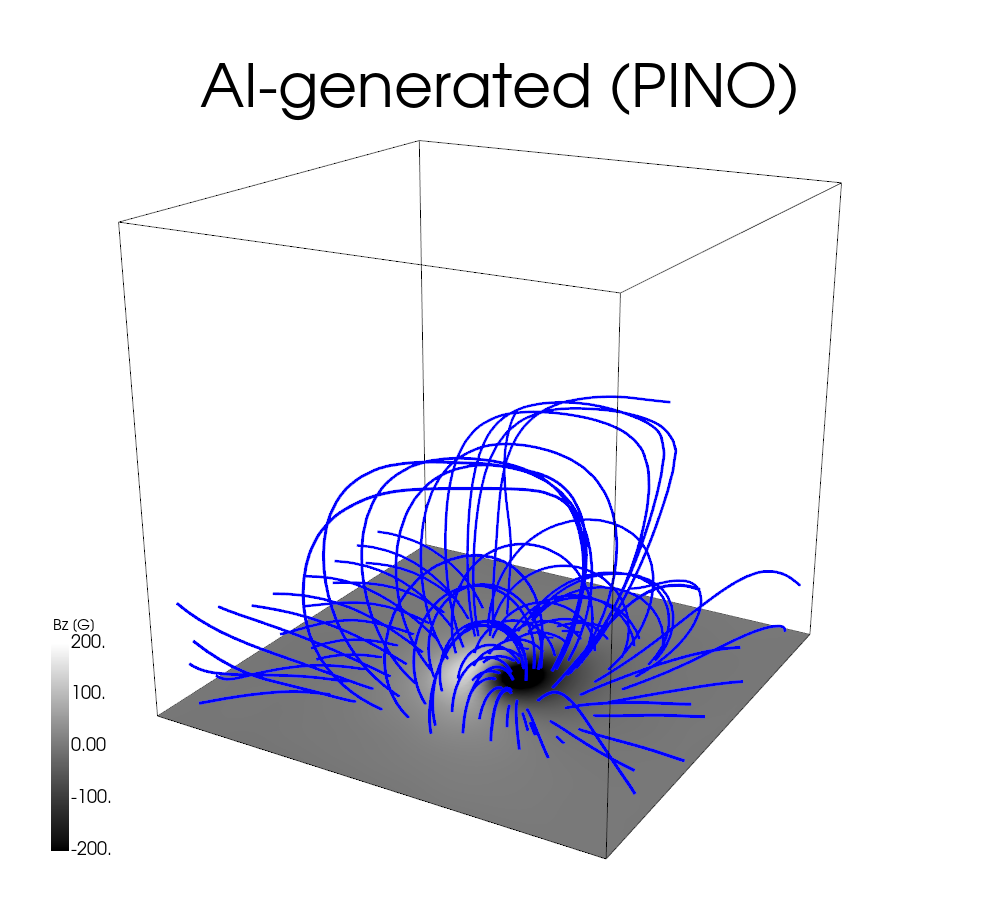

In [18]:
vmin = -200
vmax = 200
i_siz=b.shape[0] / 2
j_siz=b.shape[1] / 2
i_res=8
j_res=8
window_size=(1000, 900)
zoom=1.0
max_time=10000
camera_position = 'xy'
b_title = ''
title_fontsize = 10

bx = b[..., 0]
by = b[..., 1]
bz = b[..., 2]
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottoms, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)
b_tube = b_plot.strl.tube(radius=0.2)

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline(), color='k')
p.add_mesh(b_bottoms, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = 'yz'
p.camera.elevation = 20
p.camera.azimuth = -60
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.add_title("AI-generated (PINO)", font_size=25)
p.show()

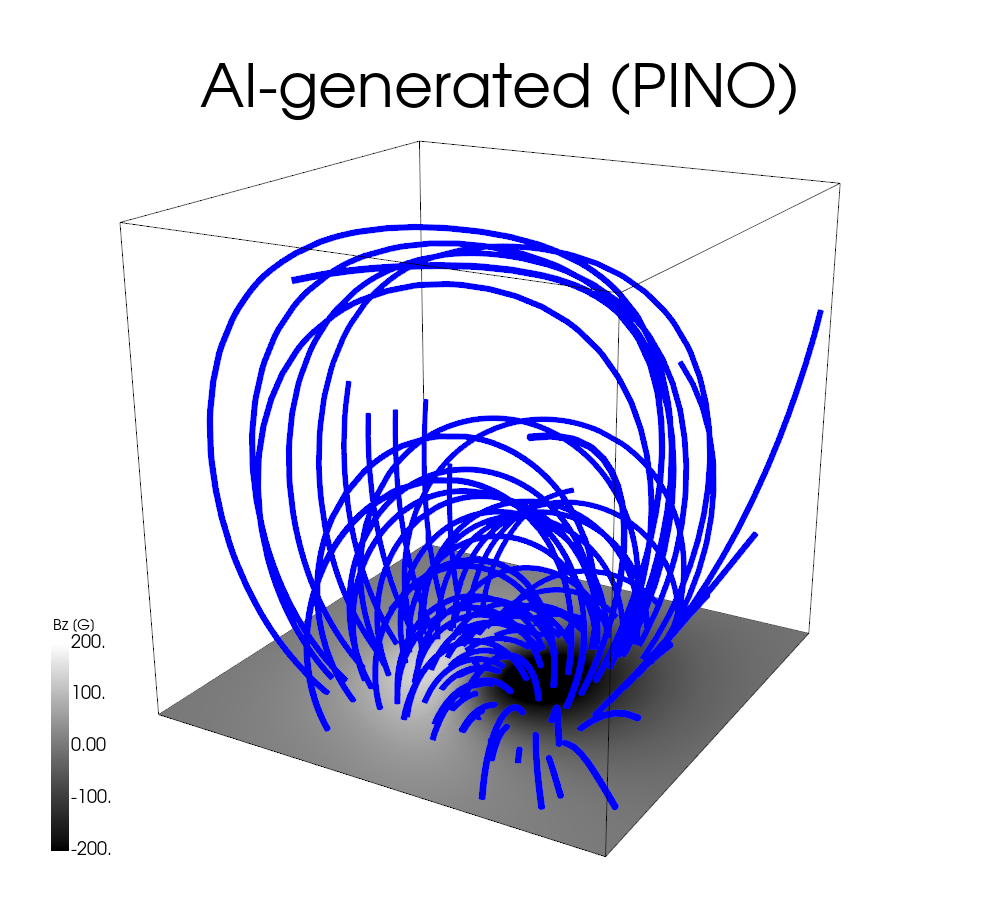

In [19]:
b = b[n:-n, n:-n, :-(2*n), :]
vmin = -200
vmax = 200
i_siz=b.shape[0] / 2
j_siz=b.shape[1] / 2
i_res=8
j_res=8
window_size=(1000, 900)
zoom=1.0
max_time=10000
camera_position = 'xy'
b_title = ''
title_fontsize = 10

bx = b[..., 0]
by = b[..., 1]
bz = b[..., 2]
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottoms, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)
b_tube = b_plot.strl.tube(radius=0.2)

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline(), color='k')
p.add_mesh(b_bottoms, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = 'yz'
p.camera.elevation = 20
p.camera.azimuth = -60
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.add_title("AI-generated (PINO)", font_size=25)
p.show()

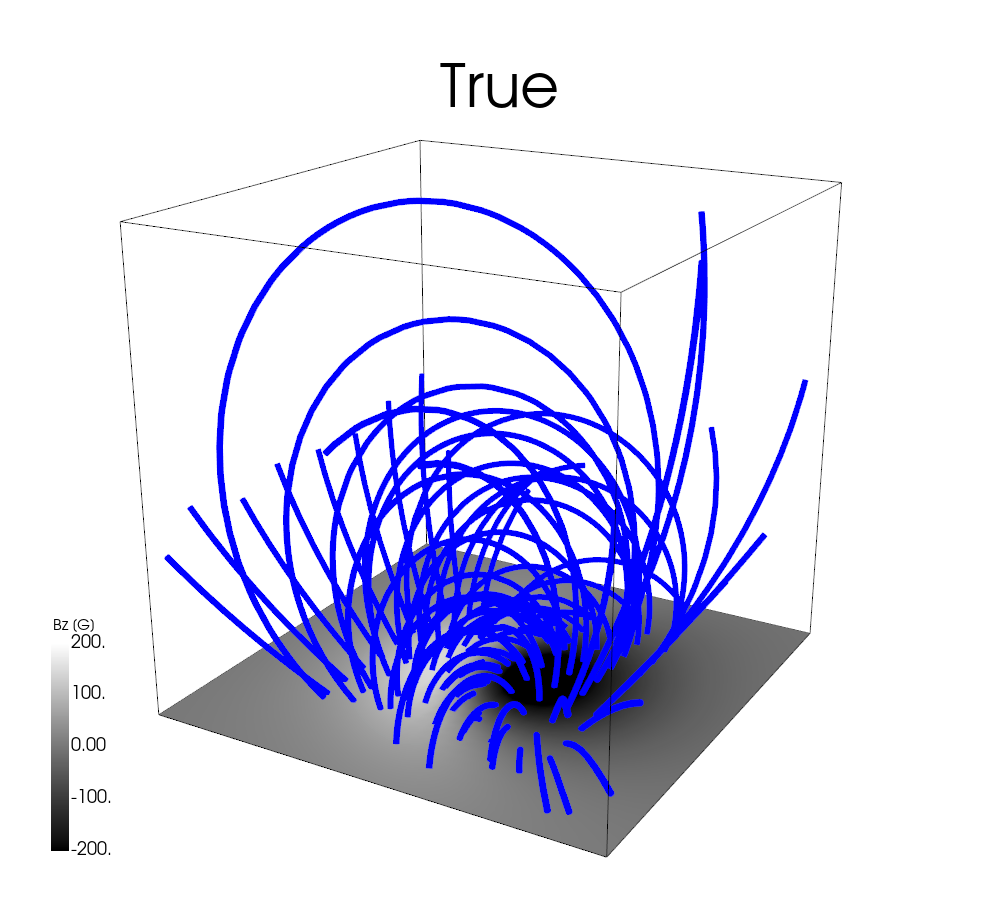

In [20]:
b = B[n:-n, n:-n, :-(2*n), :]
vmin = -200
vmax = 200
i_siz=b.shape[0] / 2
j_siz=b.shape[1] / 2
i_res=8
j_res=8
window_size=(1000, 900)
zoom=1.0
max_time=10000
camera_position = 'xy'
b_title = ''
title_fontsize = 10

bx = b[..., 0]
by = b[..., 1]
bz = b[..., 2]
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottoms, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)
b_tube = b_plot.strl.tube(radius=0.2)

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline(), color='k')
p.add_mesh(b_bottoms, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = 'yz'
p.camera.elevation = 20
p.camera.azimuth = -60
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.add_title("True", font_size=25)
p.show()